Import package

In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd
import numpy as np
sns.set(style='whitegrid')

# Data Pre-treatment
## Loading Dataset

In [4]:
def get(tickers, startdate, enddate):
    def data(ticker):
        return (yf.download(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))
tickers = ['AAPL','PEP','JNJ','BA','TSLA']
datasets = get(tickers, datetime.datetime(2020, 1, 1), datetime.datetime(2023, 1, 1))
datasets

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
AAPL   2020-01-02   74.059998   75.150002   73.797501   75.087502   73.347923   
       2020-01-03   74.287498   75.144997   74.125000   74.357498   72.634842   
       2020-01-06   73.447502   74.989998   73.187500   74.949997   73.213631   
       2020-01-07   74.959999   75.224998   74.370003   74.597504   72.869293   
       2020-01-08   74.290001   76.110001   74.290001   75.797501   74.041481   
...                       ...         ...         ...         ...         ...   
TSLA   2022-12-23  126.370003  128.619995  121.019997  123.150002  123.150002   
       2022-12-27  117.500000  119.669998  108.760002  109.099998  109.099998   
       2022-12-28  110.349998  116.269997  108.239998  112.709999  112.709999   
       2022-12-29  120.389999  123.570000  117.500000  121.820000  121.820000   
       2022-12-30  119.949997  124.480003  119.750000  123.180000  123.180000   

                      Volume  
Ticker Date                   
AAPL   2020-01-02  135480400  
       2020-01-03  146322800  
       2020-01-06  118387200  
       2020-01-07  108872000  
       2020-01-08  132079200  
...                      ...  
TSLA   2022-12-23  166989700  
       2022-12-27  208643400  
       2022-12-28  221070500  
       2022-12-29  221923300  
       2022-12-30  157777300  

[3780 rows x 6 columns]

## Ploting Datasets

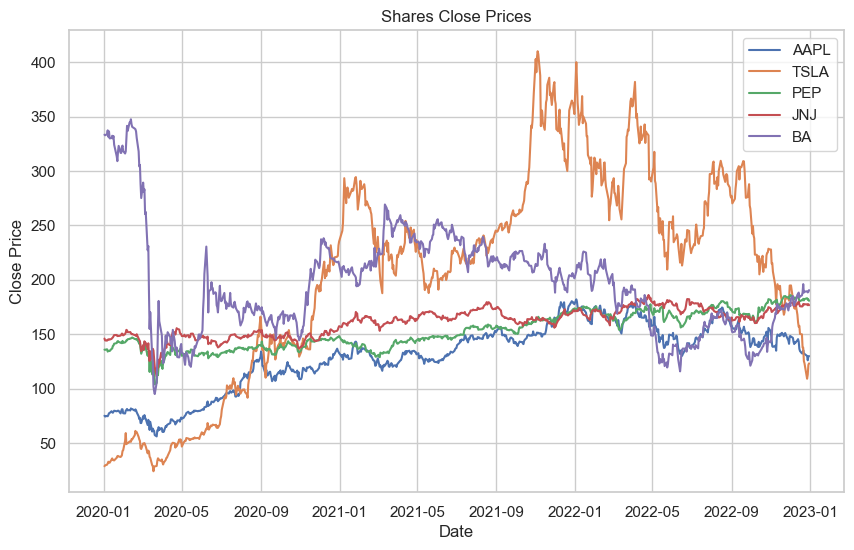

In [5]:

# Assuming your dataframe is named 'df'
aapl_data = datasets.loc['AAPL']
tsla_data = datasets.loc['TSLA']
pep_data = datasets.loc['PEP']
jnj_data = datasets.loc['JNJ']
ba_data = datasets.loc['BA']


# Plotting the 'Close' column for AAPL and EQIX
plt.figure(figsize=(10, 6))
plt.plot(aapl_data.index, aapl_data['Close'], label='AAPL')
plt.plot(tsla_data.index, tsla_data['Close'], label='TSLA')
plt.plot(pep_data.index, pep_data['Close'], label='PEP')
plt.plot(jnj_data.index, jnj_data['Close'], label='JNJ')
plt.plot(ba_data.index, ba_data['Close'], label='BA')


# Adding labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Shares Close Prices')

# Adding a legend
plt.legend(loc="upper right")

# Displaying the plot
plt.show()

In [10]:
# Initialize the short and long windows
short_window = 60
long_window = 240

signals = pd.DataFrame()
for ticker in tickers:
    dataset  = datasets.loc[ticker]

    # Initialize the `signals` DataFrame with the `signal` column
    signal = pd.DataFrame(index=dataset.index)
    signal['ticker'] = ticker
    signal['signal'] = 0.0  #Create a column in your empty signals DataFrame that is named signal

    #make an empty signals DataFrame, but do make sure to copy the index of your aapl data
    signal['return'] = dataset['Close'].pct_change()
    #and initialize it by setting the value for all rows in this column to 0.0

    # Create short simple moving average over the short window
    signal['short_mavg'] = dataset['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

    #1 as the minimum number of observations in the window that are required to have a value, and False,
    #so that the labels are not set at the center of the window.
     #Next, don’t forget to also chain the mean() function so that you calculate the rolling mean.


    # Create long simple moving average over the long window
    signal['long_mavg'] = dataset['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

    # Create signals
    signal['signal'][short_window:] = np.where(signal['short_mavg'][short_window:]
                                                > signal['long_mavg'][short_window:], 1.0, 0.0)

    # Generate trading orders
    #you take the difference of the signals in order to generate actual trading orders.
    signal['positions'] = signal['signal'].diff()

    signal['Close'] = dataset['Close']

    signals = pd.concat([signals,signal],axis=0)
    # Print `signals`

signals

/Volumes/Samsung_T7/dataAnalysisPlatform/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ticker,signal,return,short_mavg,long_mavg,positions,Close
Date,,,,,,,
2020-01-02,AAPL,0.0,NaN,75.087502,75.087502,NaN,75.087502
2020-01-03,AAPL,0.0,-0.009722,74.722500,74.722500,0.0,74.357498
2020-01-06,AAPL,0.0,0.007968,74.798332,74.798332,0.0,74.949997
2020-01-07,AAPL,0.0,-0.004703,74.748125,74.748125,0.0,74.597504
2020-01-08,AAPL,0.0,0.016086,74.958000,74.958000,0.0,75.797501
...,...,...,...,...,...,...,...
2022-12-23,TSLA,0.0,-0.017551,195.450334,262.579153,0.0,123.150002
2022-12-27,TSLA,0.0,-0.114089,192.847834,261.497320,0.0,109.099998
2022-12-28,TSLA,0.0,0.033089,190.686334,260.534222,0.0,112.709999


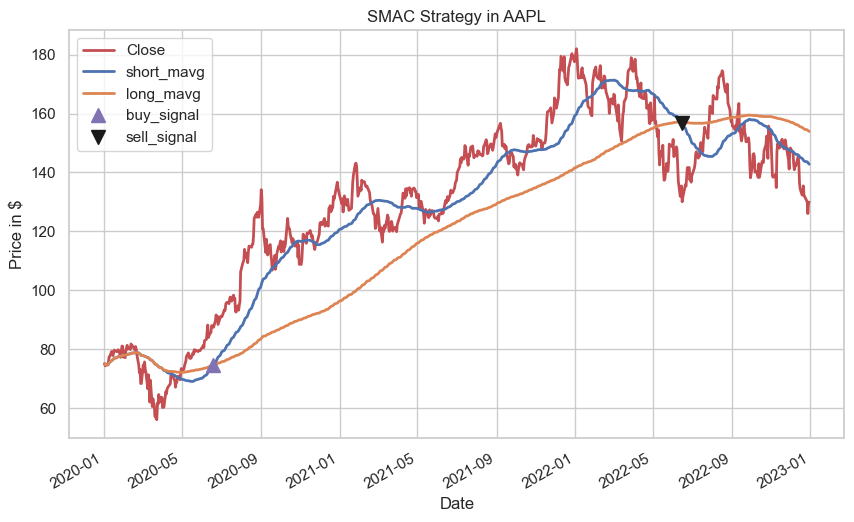

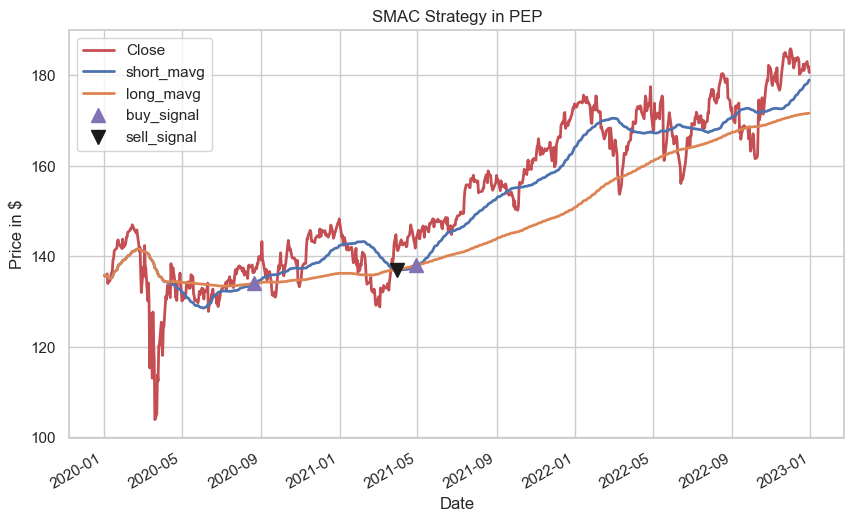

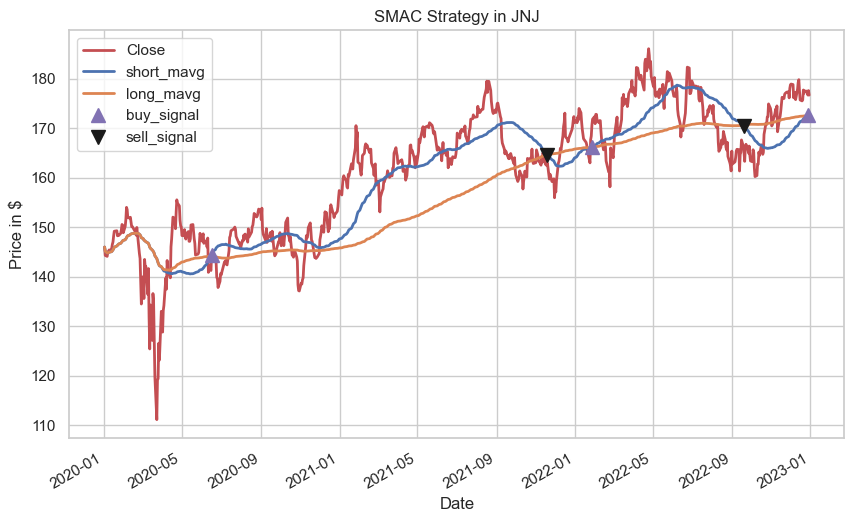

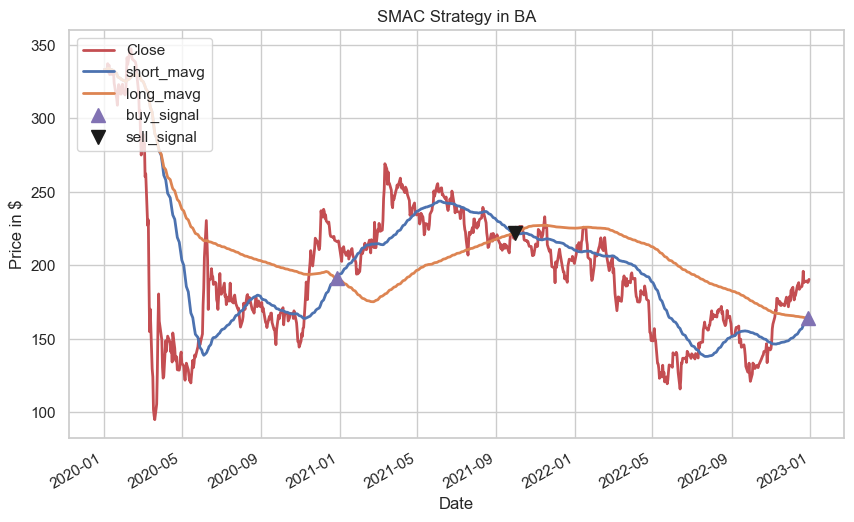

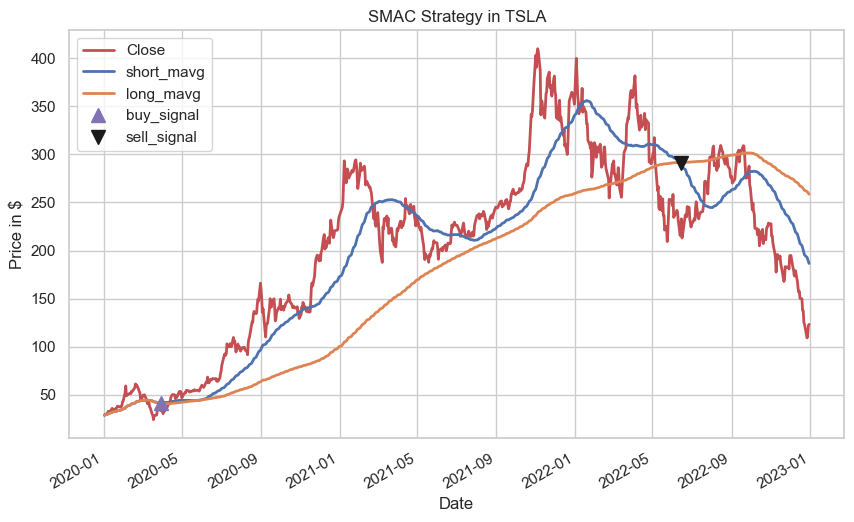

In [11]:
for ticker in tickers:
    dataset  = datasets.loc[ticker]
    signal  = signals[signals['ticker'] == ticker]
    # Initialize the plot figure
    fig = plt.figure()

    # Add a subplot and label for y-axis
    ax1 = fig.add_subplot(111,  ylabel='Price in $')

    # Plot the closing price
    dataset['Close'].plot(ax=ax1, color='r', lw=2.)

    # Plot the short and long moving averages
    signal[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.,figsize=(10, 6))

    # Plot the buy signal
    ax1.plot(signal.loc[signal.positions == 1.0].index,
             signal.short_mavg[signal.positions == 1.0],
             '^', markersize=10, color='m')

    # Plot the sell signal
    ax1.plot(signal.loc[signal.positions == -1.0].index,
             signal.short_mavg[signal.positions == -1.0],
             'v', markersize=10, color='k')

    plt.title('SMAC Strategy in {ticker}'.format(ticker=ticker))
    plt.legend(["Close","short_mavg","long_mavg","buy_signal","sell_signal"],loc="upper left")
    # Show the plot
    plt.show()

# Backtesting The Trading Strategy

In [12]:
portfolios = pd.DataFrame()
for ticker in tickers:
    dataset  = datasets.loc[ticker]
    signal  = signals[signals['ticker'] == ticker]
    # Set the initial capital
    initial_capital= float(100000.0)

    # Create a DataFrame `positions`
    positions = pd.DataFrame(index=signal.index).fillna(0.0)
    # Once again, you copy the index from another DataFrame;
    #In this case, this is the signals DataFrame because you want to consider the time frame for which you have generated the signal.

    # Buy a 100 shares
    positions['AAPL'] = 100*signal['signal']

    # Initialize the portfolio with value owned
    # A new DataFrame portfolio is created to store the market value of an open position
    portfolio = positions.multiply(dataset['Adj Close'], axis=0)

    # Store the differences in positions (or number of stock)
    pos_diff = positions.diff()

    # Add `holdings` to portfolio
    #you create a new column to the portfolio DataFrame with name holdings,
    # which stores the value of the positions or shares you have bought, multiplied by the ‘Adj Close’ price.
    portfolio['holdings'] = (positions.multiply(dataset['Adj Close'], axis=0)).sum(axis=1)

    # Add `cash` to portfolio which is the capital that you still have left to spend
    portfolio['cash'] = initial_capital - (pos_diff.multiply(dataset['Adj Close'], axis=0)).sum(axis=1).cumsum()

    # Add `total` to portfolio which contains the sum of your cash and the holdings that you own
    portfolio['total'] = portfolio['cash'] + portfolio['holdings']

    # Add `returns` to portfolio in which you’ll store the returns
    portfolio['returns'] = portfolio['total'].pct_change()

    portfolio['ticker'] = ticker
    portfolios = pd.concat([portfolios,portfolio],axis=0)
    print(portfolio)

            AAPL  holdings          cash         total  returns ticker
Date                                                                  
2020-01-02   0.0       0.0  100000.00000  100000.00000      NaN   AAPL
2020-01-03   0.0       0.0  100000.00000  100000.00000      0.0   AAPL
2020-01-06   0.0       0.0  100000.00000  100000.00000      0.0   AAPL
2020-01-07   0.0       0.0  100000.00000  100000.00000      0.0   AAPL
2020-01-08   0.0       0.0  100000.00000  100000.00000      0.0   AAPL
...          ...       ...           ...           ...      ...    ...
2022-12-23   0.0       0.0  104829.38385  104829.38385      0.0   AAPL
2022-12-27   0.0       0.0  104829.38385  104829.38385      0.0   AAPL
2022-12-28   0.0       0.0  104829.38385  104829.38385      0.0   AAPL
2022-12-29   0.0       0.0  104829.38385  104829.38385      0.0   AAPL
2022-12-30   0.0       0.0  104829.38385  104829.38385      0.0   AAPL

[756 rows x 6 columns]
                    AAPL      holdings           cash

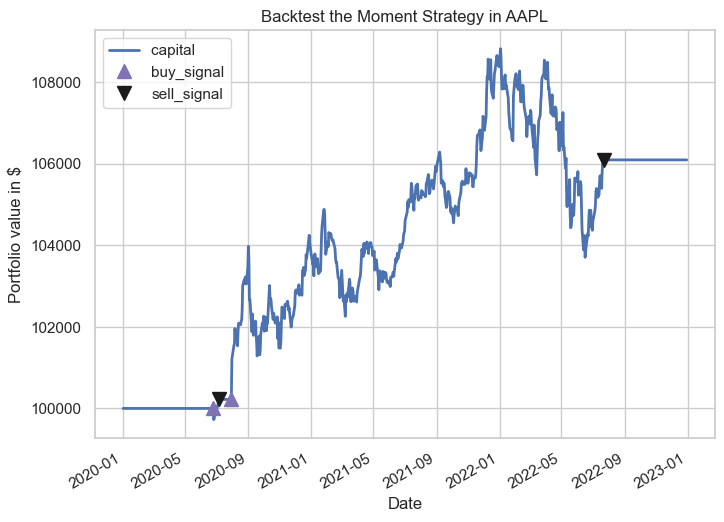

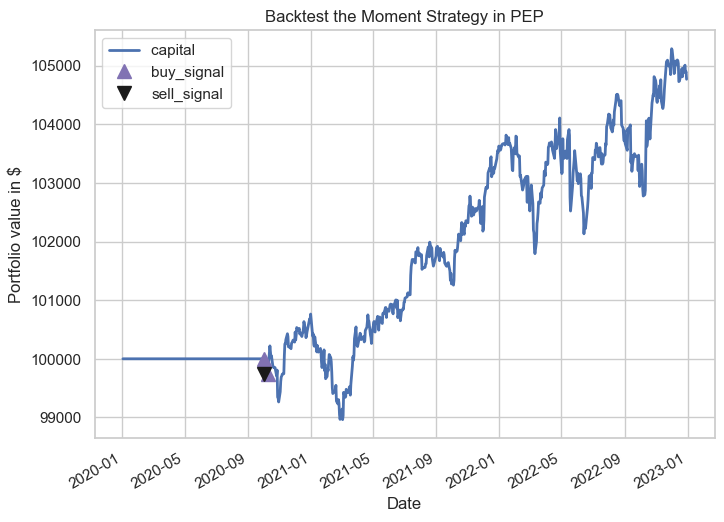

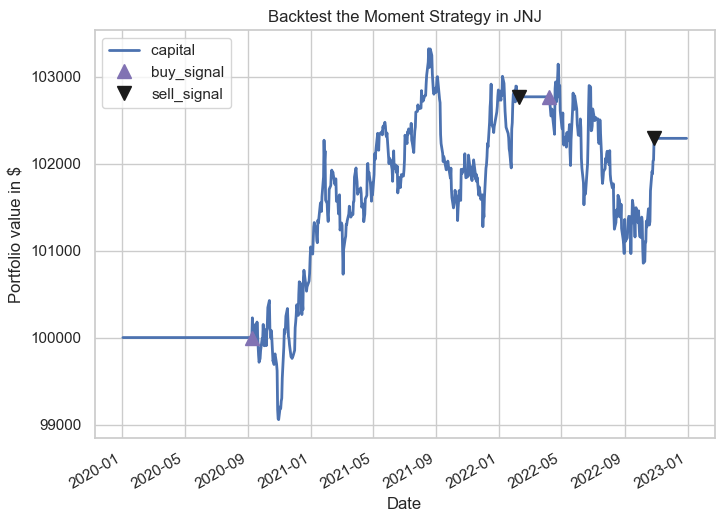

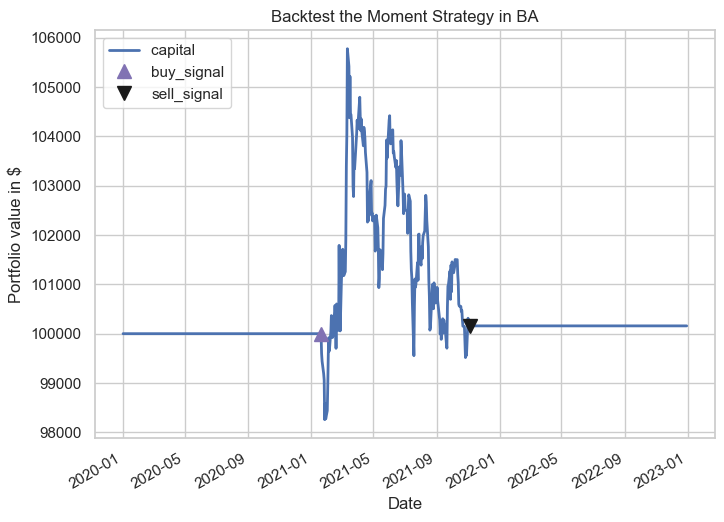

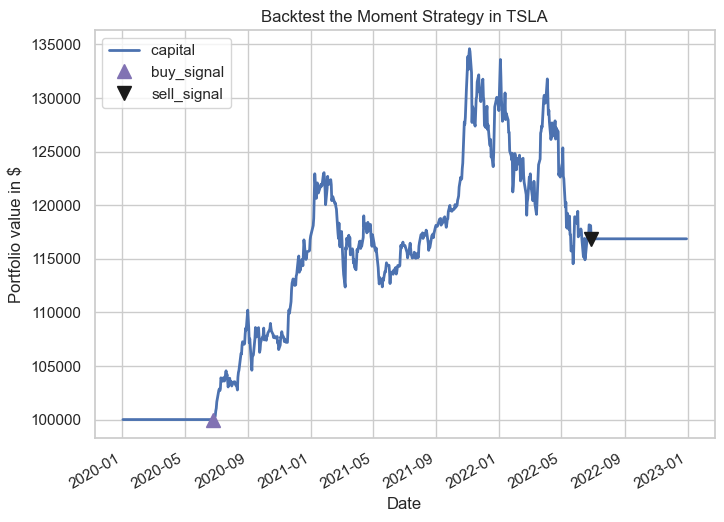

In [9]:
for ticker in tickers:
    dataset  = datasets.loc[ticker]
    signal  = signals[signals['ticker'] == ticker]
    portfolio  = portfolios[portfolios['ticker'] == ticker]
    fig = plt.figure(figsize=(8, 6))

    ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

    # Plot the equity curve in dollars
    portfolio['total'].plot(ax=ax1, lw=2.)

    # Plot the "buy" trades against the equity curve
    ax1.plot(portfolio.loc[signal.positions == 1.0].index,
             portfolio.total[signal.positions == 1.0],
             '^', markersize=10, color='m')

    # Plot the "sell" trades against the equity curve
    ax1.plot(portfolio.loc[signal.positions == -1.0].index,
             portfolio.total[signal.positions == -1.0],
             'v', markersize=10, color='k')

    plt.title('Backtest the Moment Strategy in {ticker}'.format(ticker=ticker))
    plt.legend(["capital ","buy_signal","sell_signal"],loc="upper left")
    # Show the plot
    plt.show()


# Improving The Trading Strategy

In [13]:
#Improving The Trading Strategy
# Isolate the returns of your strategy
for ticker in tickers:
    dataset  = datasets.loc[ticker]
    signal  = signals[signals['ticker'] == ticker]
    portfolio  = portfolios[portfolios['ticker'] == ticker]
    returns = portfolio['returns']

    # annualized Sharpe ratio
    sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

    # Print the Sharpe ratio
    print(sharpe_ratio)

0.4889176932989471
0.7309002406125757
0.3316898224037175
0.06529019715138726
0.6024108343558953


In [240]:
dataset  = datasets.loc[ticker]
signal  = signals[signals['ticker'] == 'AAPL']
portfolio  = portfolios[portfolios['ticker'] == 'AAPL']
signal

,ticker,signal,return,short_mavg,long_mavg,positions,Close
Date,,,,,,,
2020-01-02,AAPL,0.0,NaN,75.087502,75.087502,NaN,75.087502
2020-01-03,AAPL,0.0,-0.009722,74.722500,74.722500,0.0,74.357498
2020-01-06,AAPL,0.0,0.007968,74.798332,74.798332,0.0,74.949997
2020-01-07,AAPL,0.0,-0.004703,74.748125,74.748125,0.0,74.597504
2020-01-08,AAPL,0.0,0.016086,74.958000,74.958000,0.0,75.797501
...,...,...,...,...,...,...,...
2022-12-23,AAPL,0.0,-0.002798,143.766499,150.910083,0.0,131.860001
2022-12-27,AAPL,0.0,-0.013878,143.630333,150.774083,0.0,130.029999
2022-12-28,AAPL,0.0,-0.030685,143.356833,150.599083,0.0,126.040001


In [265]:
# Define the stop loss and take profit levels
stop_loss_level = 0.99  # 5% loss
take_profit_level = 1.01  # 5% profit

portfolios = pd.DataFrame()
for ticker in tickers:
    dataset  = datasets.loc[ticker]
    signal  = signals[signals['ticker'] == ticker]
    # Set the initial capital
    initial_capital= float(100000.0)

    # Create a DataFrame `positions`
    positions = pd.DataFrame(index=signal.index).fillna(0.0)

    # Buy a 100 shares
    positions[ticker] = 100*signal['signal']

    # Initialize the portfolio with value owned
    portfolio = positions.multiply(dataset['Adj Close'], axis=0)

    # Store the differences in positions (or number of stock)
    pos_diff = positions.diff()

    # Add `holdings` to portfolio
    portfolio['holdings'] = (positions.multiply(dataset['Adj Close'], axis=0)).sum(axis=1)

    # Add `cash` to portfolio which is the capital that you still have left to spend
    portfolio['cash'] = initial_capital - (pos_diff.multiply(dataset['Adj Close'], axis=0)).sum(axis=1).cumsum()

    # Initialize the buy price (this should be updated whenever you make a new purchase)
    buy_price = None

    # Iterate over the rows of the portfolio DataFrame
    for index, row in portfolio.iterrows():
        # If we're currently holding a position
        if row[ticker] != 0:
            if buy_price is None:
                buy_price = row[ticker]
            elif row[ticker] <= buy_price * stop_loss_level or row[ticker] >= buy_price * take_profit_level:
                # Update the cash and holdings when the stop loss or take profit is triggered
                portfolio.loc[index, 'cash'] += row['holdings']
                portfolio.loc[index, 'holdings'] = 0
                portfolio.loc[index, ticker] = 0
                buy_price = None

    # Add `total` to portfolio which contains the sum of your cash and the holdings that you own
    portfolio['total'] = portfolio['cash'] + portfolio['holdings']

    # Add `returns` to portfolio in which you’ll store the returns
    portfolio['returns'] = portfolio['total'].pct_change()

    portfolio['ticker'] = ticker
    portfolios = pd.concat([portfolios,portfolio],axis=0)
    print(portfolio)

            AAPL  holdings           cash          total  returns ticker
Date                                                                    
2020-01-02   0.0       0.0  100000.000000  100000.000000      NaN   AAPL
2020-01-03   0.0       0.0  100000.000000  100000.000000      0.0   AAPL
2020-01-06   0.0       0.0  100000.000000  100000.000000      0.0   AAPL
2020-01-07   0.0       0.0  100000.000000  100000.000000      0.0   AAPL
2020-01-08   0.0       0.0  100000.000000  100000.000000      0.0   AAPL
...          ...       ...            ...            ...      ...    ...
2022-12-23   0.0       0.0  105740.238953  105740.238953      0.0   AAPL
2022-12-27   0.0       0.0  105740.238953  105740.238953      0.0   AAPL
2022-12-28   0.0       0.0  105740.238953  105740.238953      0.0   AAPL
2022-12-29   0.0       0.0  105740.238953  105740.238953      0.0   AAPL
2022-12-30   0.0       0.0  105740.238953  105740.238953      0.0   AAPL

[756 rows x 6 columns]
            TSLA  holdings 

## Stop-Loss and Take-Profit

In [255]:
# Apply stop-loss and take-profit rules.
stop_loss_level = -0.02  # 2% stop loss
take_profit_level = 0.05  # 5% take profit
# Close positions where stop-loss or take-profit is triggered.
# Compute strategy returns.
signal['Strategy Return'] = signal['return'] * signal['positions']
signal['Cumulative Return'] = signal['Strategy Return'].cumsum()
stop_loss_rows = signal[signal['Cumulative Return'] <= stop_loss_level].index
take_profit_rows = signal[signal['Cumulative Return'] >= take_profit_level].index
signal['positions_LP'] = signal['positions']
signal = signal.copy()
signal.loc[stop_loss_rows, 'positions_LP'] = 0
signal.loc[take_profit_rows, 'positions_LP'] = 0
# Compute final strategy returns.
signal['Final Strategy Return'] = signal['return'] * signal['positions']

# Print total return of the strategy.
print(signal['Final Strategy Return'].sum())

0.08933967636840612


In [251]:
signal

,ticker,signal,return,short_mavg,long_mavg,positions,Close,Strategy Return,Cumulative Return,position_LP,positions_LP,Final Strategy Return
Date,,,,,,,,,,,,
2020-01-02,AAPL,0.0,NaN,75.087502,75.087502,NaN,75.087502,NaN,NaN,0.0,NaN,NaN
2020-01-03,AAPL,0.0,-0.009722,74.722500,74.722500,0.0,74.357498,-0.0,0.000000,0.0,0.0,-0.0
2020-01-06,AAPL,0.0,0.007968,74.798332,74.798332,0.0,74.949997,0.0,0.000000,0.0,0.0,0.0
2020-01-07,AAPL,0.0,-0.004703,74.748125,74.748125,0.0,74.597504,-0.0,0.000000,0.0,0.0,-0.0
2020-01-08,AAPL,0.0,0.016086,74.958000,74.958000,0.0,75.797501,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,AAPL,0.0,-0.002798,143.766499,150.910083,0.0,131.860001,-0.0,0.684812,0.0,0.0,-0.0
2022-12-27,AAPL,0.0,-0.013878,143.630333,150.774083,0.0,130.029999,-0.0,0.684812,0.0,0.0,-0.0
2022-12-28,AAPL,0.0,-0.030685,143.356833,150.599083,0.0,126.040001,-0.0,0.684812,0.0,0.0,-0.0


In [ ]:

import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index,
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index,
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [22]:
# Calculate the RSI.

def calculate_rsi(df, periods):
    delta = df['Close'].diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0

    average_gain = up.rolling(periods).mean()
    average_loss = abs(down.rolling(periods).mean())

    rs = average_gain / average_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi
signals['RSI'] = calculate_rsi(signals, 14)

In [70]:
# Create signals: 1 for bullish crossover (and RSI < 30), -1 for bearish crossover (and RSI > 70), 0 otherwise.
signals['Signal_1'] = 0
signals['Signal_1'][(signals['short_mavg'] > signals['long_mavg']) & (signals['RSI'] < 30)] = -1
signals['Signal_1'][(signals['short_mavg'] > signals['long_mavg']) & (signals['RSI'] > 70)] = 1

# Assume we start with no position.
signals['Position_1'] = signals['Signal_1'].shift()

# Compute daily returns.
signals['Return_1'] = signals['Close'].pct_change()

# Compute strategy returns.
signals['Strategy Return_1'] = signals['Return_1'] * signals['Position_1']

# Print total return of the strategy.
print(signals['Strategy Return_1'].sum())

0.06959180444770618


/Volumes/Samsung_T7/dataAnalysisPlatform/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Volumes/Samsung_T7/dataAnalysisPlatform/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [259]:
# Define the stop loss and take profit levels
stop_loss_level = 0.95  # 5% loss
take_profit_level = 1.05  # 5% profit

# Initialize the buy price (this should be updated whenever you make a new purchase)
buy_price = None

# Initialize a variable to hold the current position (this should be updated whenever you buy or sell)
position = None

# Initialize the portfolio with the initial capital
portfolio_value = initial_capital

# Iterate over the signal DataFrame
for index, row in signal.iterrows():
    price = row['Close']

    # If we're currently holding a position
    if position is not None:
        if price <= buy_price * stop_loss_level:
            print(f'Stop-Loss triggered at {price}')
            portfolio_value *= price / buy_price  # Update the portfolio value based on the price change
            position = None
            buy_price = None
        elif price >= buy_price * take_profit_level:
            print(f'Take-Profit triggered at {price}')
            portfolio_value *= price / buy_price  # Update the portfolio value based on the price change
            position = None
            buy_price = None

    # If we're not currently holding a position and a buy signal is triggered
    elif row['positions'] == 1.0:
        position = 'long'
        buy_price = price
        print(f'Buy at {price}')

    # If we're not currently holding a position and a sell signal is triggered
    elif row['positions'] == -1.0:
        position = 'short'
        buy_price = price
        print(f'Sell at {price}')

# Print the final portfolio value
print(f'Final portfolio value: {portfolio_value}')

Buy at 87.93250274658203
Take-Profit triggered at 93.4625015258789
Sell at 127.8499984741211
Take-Profit triggered at 134.77999877929688
Sell at 157.64999389648438
Take-Profit triggered at 166.02000427246094
Buy at 155.30999755859375
Stop-Loss triggered at 142.47999572753906
Sell at 148.27999877929688
Stop-Loss triggered at 136.5
Final portfolio value: 99651.46963956347


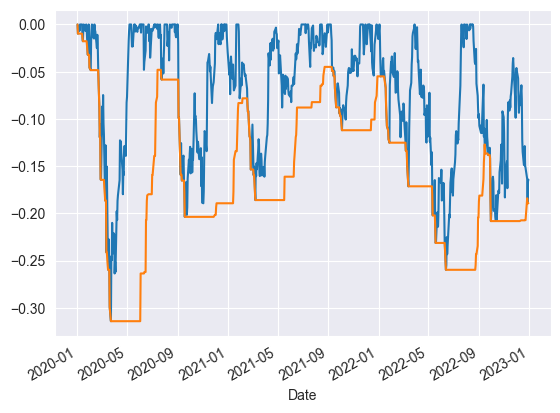

In [107]:
# Define a trailing 252 trading day window
window = 50

# Calculate the max drawdown in the past window days for each day
rolling_max = aapl['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()